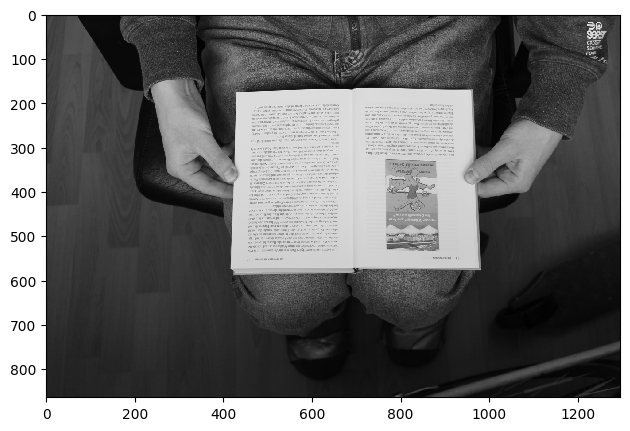

In [26]:
from typing import (List, Any)
import numpy
import skimage as skimage
from skimage import (io, transform)

def showImg(image):
    return io.imshow(arr=image, plugin="matplotlib")

input_image_path = "../examples/books/makers/img_4160.jpg"
book = io.imread(fname=input_image_path)
book_grayscale = skimage.color.rgb2gray(book)

resized = transform.downscale_local_mean(book_grayscale, (4, 4))

showImg(resized)

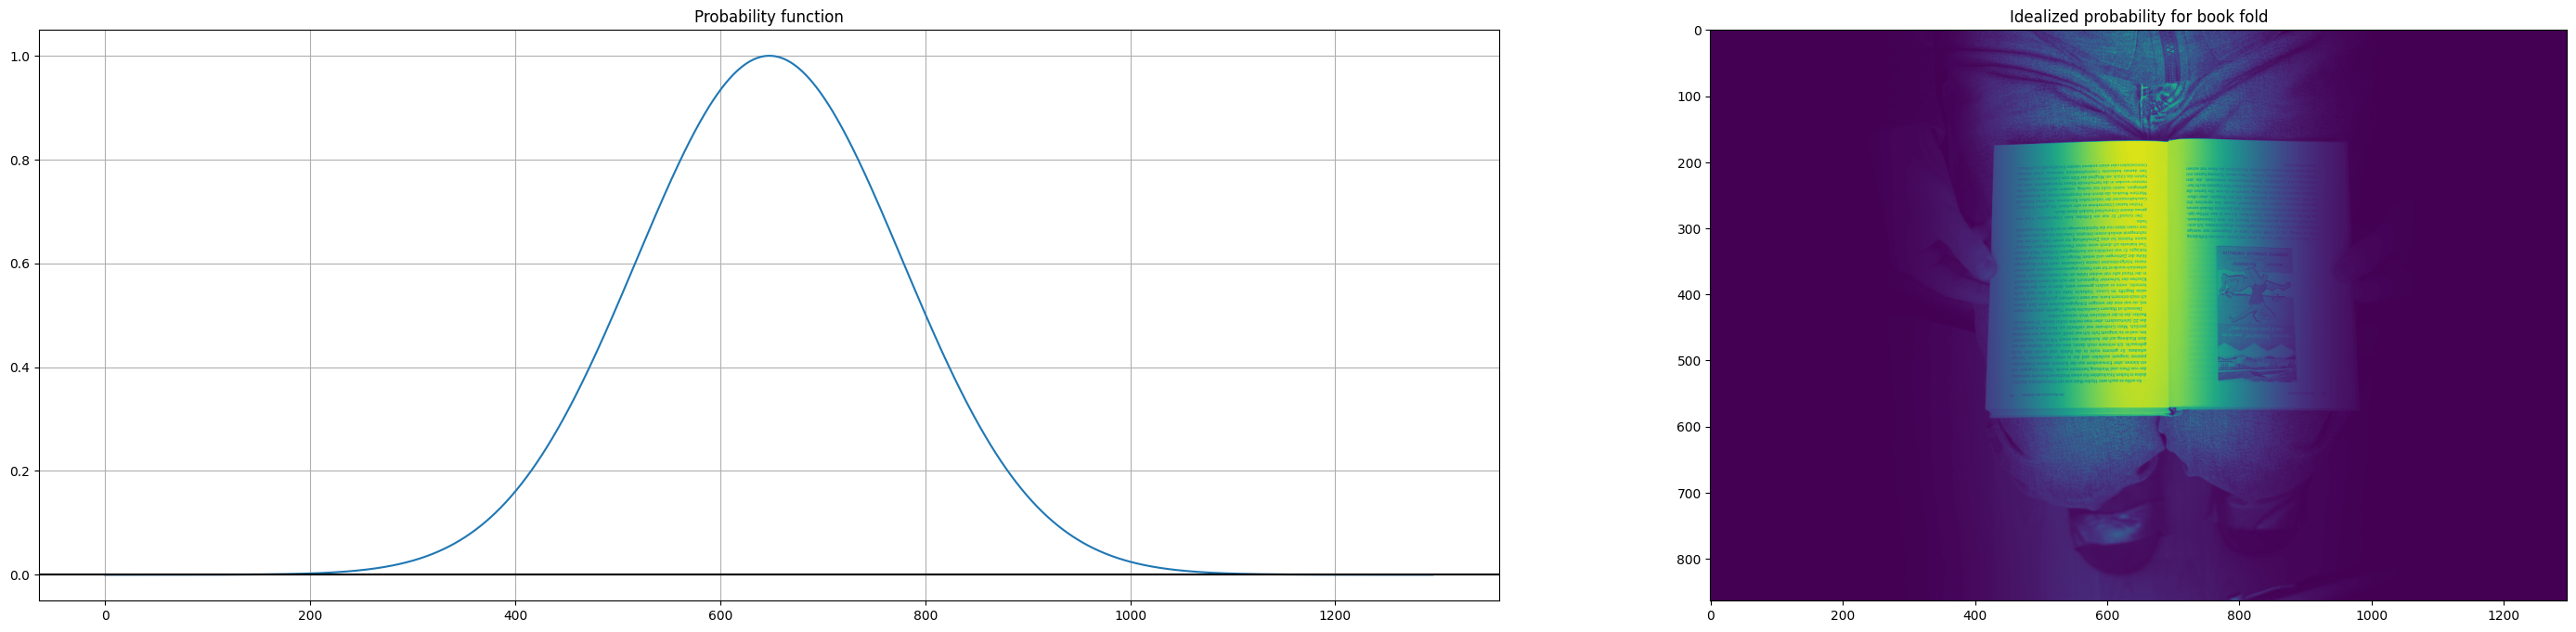

In [27]:
import numpy as numpy
from scipy.stats import norm
import matplotlib.pyplot as plot

img_width = resized.shape[1]
img_height = resized.shape[0]

def get_sine_probability(img_width, img_height):
    # Get x values of the sine wave
    samples = numpy.arange(0, numpy.pi, numpy.pi / img_width)

    # Amplitude of the sine wave is sine of a variable like time
    amplitude = numpy.sin(samples)

    # Repeat values in y direction to generate a gradient image
    gradient_image = numpy.broadcast_to(amplitude, (img_height, img_width))
    probabilitized = resized * gradient_image

    return probabilitized


def get_norm_probability(img_width):
    samples = numpy.arange(img_width)
    spread = 10  # Magic constant to specify the width of the bell curve
    amplitude = norm.pdf(samples, img_width/2, img_width/spread)
    amplitude *= 1/amplitude.max()  # Spread to range [0,1]
    return amplitude


def apply_probability(probability, image):
    gradient_image = numpy.broadcast_to(probability, (image.shape[0], image.shape[1]))
    probabilitized = image * gradient_image
    return probabilitized


pxInInch = 0.008
prob_norm = get_norm_probability(img_width)
image_prob = apply_probability(prob_norm, resized)


fig, items = plot.subplots(
    ncols=2, 
    figsize=(3 * img_width * pxInInch, img_height * pxInInch)
)

items[0].plot(numpy.arange(img_width), prob_norm)

items[0].set_title("Probability function")
items[0].grid(True, which="both")
items[0].axhline(y=0, color="k")

items[1].set_title("Idealized probability for book fold")
items[1].imshow(image_prob)

fig.tight_layout()
plot.show()

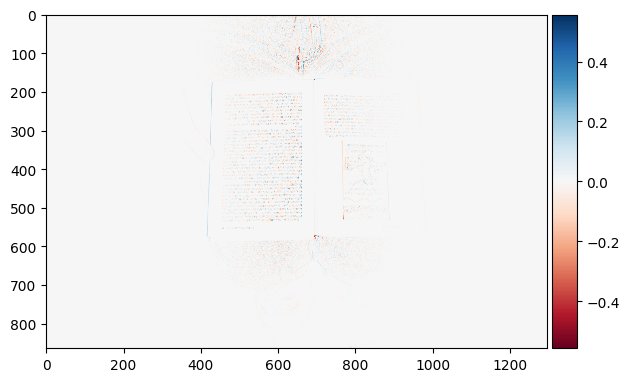

In [28]:
from skimage import (io, filters)

sobeled = filters.sobel_v(
    image=resized,
)

io.imshow(apply_probability(prob_norm, sobeled))

In [29]:
import imageio.v3 as imageio

def split_book(image) -> List[List[int]]:
    return []

image = imageio.imread(input_image_path, rotate=True)
pages = split_book(image)

pages

[]